# Directional Spectra

In [1]:
# arrays
import numpy as np
import math

# plots
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

# panel interaction
import panel as pn

pn.extension('plotly')

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
def plotSpec3D(spec, f, w):
    
    layout = go.Layout(scene=dict(aspectmode="cube"))

    fig = go.Figure(go.Surface(contours = {"z": {"show": True, "color":"white", "start": 0, "end": 50, "size":0.05},},
                                     z=spec, x=f, y=w, colorscale='jet'))
    fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))
    
    fig.update_layout(
        width=500, height=500,
        scene = dict(
                    xaxis_title='f',
                    yaxis_title='theta',
                    zaxis_title='S(f, theta)',
                    zaxis = dict(nticks=10, range=[0,50]),
                    yaxis = dict(range=[-np.pi, np.pi]),
        )
    )
    
    plt.close()
    
    return(fig)

In [3]:
def plotSpec2D(spec, f, w):
    
    fig, ax = plt.subplots(subplot_kw={"projection": "polar"}, figsize=(6,6))

    # spectrum axis
    ax.set_theta_zero_location('N',offset=0)
    ax.set_theta_direction(-1)
     
    surf = ax.pcolormesh(
        w, f,
        spec.T, cmap='jet',
        shading='auto',
    )
    plt.colorbar(surf)

    plt.close()
    return(fig)

In [4]:
def Dcos(w):
    D = np.where((w > -np.pi/2) & (w < np.pi/2), (2/np.pi) * np.cos(w)**2, 0)
    return(D)

def DLH(w, s):
    D = (2**(2*s-1)/np.pi) * (math.gamma(s+1)**2)/(math.gamma(2*s+1)) * np.cos(w/2)**(2*s)
    return(D)

In [5]:
def JonswapSpec(f, Hs, Tp, gamma):
    'Evaluate the JONSWAP-gamma parameter of the wave spectrum defined by PSD=f(f, E)'

    fp = 1 / Tp
    sigma = np.where(f < fp, np.ones(len(f))*0.07, np.ones(len(f))*0.09) 

    # Calculate spectral shape
    Sf1 = (0.0624/(0.230 + 0.0336*gamma - 0.185 * (1.9 + gamma)**(-1))) * Hs**2 * Tp**(-4) * f**(-5)
    Sf2 = np.exp(-1.25 * (Tp * f)**(-4)) * gamma**(np.exp((-(Tp*f - 1)**2)/(2 * sigma)))
    Sf = Sf1 * Sf2
    
    return(Sf)

In [6]:
def DirSpec3D(Hs, Tp, gamma):
    
    f = np.linspace(1/30, 0.7, 200)
    w = np.linspace(-np.pi, np.pi, 100)
    
    # cos2
    X, Y = np.meshgrid(JonswapSpec(f, Hs, Tp, gamma), Dcos(w))
    spec = X * Y
    fig = plotSpec3D(spec, f, w)
    
    return(fig)

def DirSpec3D_LG(Hs, Tp, gamma,s):
    
    f = np.linspace(1/30, 0.7, 200)
    w = np.linspace(-np.pi, np.pi, 100)
    
    # cos2
    X, Y = np.meshgrid(JonswapSpec(f, Hs, Tp, gamma), DLH(w,s))
    spec = X * Y
    fig = plotSpec3D(spec, f, w)
    
    return(fig)    

In [7]:
def DirSpec2D(Hs, Tp, gamma):
    
    f = np.linspace(1/30, 0.7, 200)
    w = np.linspace(-np.pi, np.pi, 100)
    
    X, Y = np.meshgrid(JonswapSpec(f, Hs, Tp, gamma), Dcos(w))
    spec = X * Y
    
    fig = plotSpec2D(spec, f, w)

    return(fig)

def DirSpec2D_LG(Hs, Tp, gamma, s):
    
    f = np.linspace(1/30, 0.7, 200)
    w = np.linspace(-np.pi, np.pi, 100)
    
    X, Y = np.meshgrid(JonswapSpec(f, Hs, Tp, gamma), DLH(w, s))
    spec = X * Y
    
    fig = plotSpec2D(spec, f, w)

    return(fig)

$$D(\theta)=\frac{2}{\pi}\cdot cos^{2}\theta$$

$$-\frac{\pi}{2} \leq \theta \leq \frac{\pi}{2}$$

In [8]:
kw = dict(
    Hs=(0, 10, 0.5, 1.5), Tp=(0, 25, 1, 3), gamma=(1, 20, 1, 3)
)

In [9]:
i = pn.interact(DirSpec3D, **kw)
ii = pn.interact(DirSpec2D, **kw)

In [10]:
panel = pn.Column(
    '**3D PLOT - Custom Directional spectrum from Hs, Tp, and gamma parameters**',
    pn.Column(
        i[0][0],i[0][1],i[0][2]
    ),
    pn.Row(i[1]),
)
panel

Column
    [0] Markdown(str)
    [1] Column
        [0] FloatSlider(end=10, name='Hs', step=0.5, value=1.5)
        [1] IntSlider(end=25, name='Tp', value=3)
        [2] IntSlider(end=20, name='gamma', start=1, value=3)
    [2] Row
        [0] Row
            [0] Plotly(Figure, name='interactive00101')

Column
    [0] Markdown(str)
    [1] Column
        [0] FloatSlider(end=10, name='Hs', step=0.5, value=1.5)
        [1] IntSlider(end=25, name='Tp', value=3)
        [2] IntSlider(end=20, name='gamma', start=1, value=3)
    [2] Row
        [0] Row
            [0] Matplotlib(Figure, name='interactive00110')
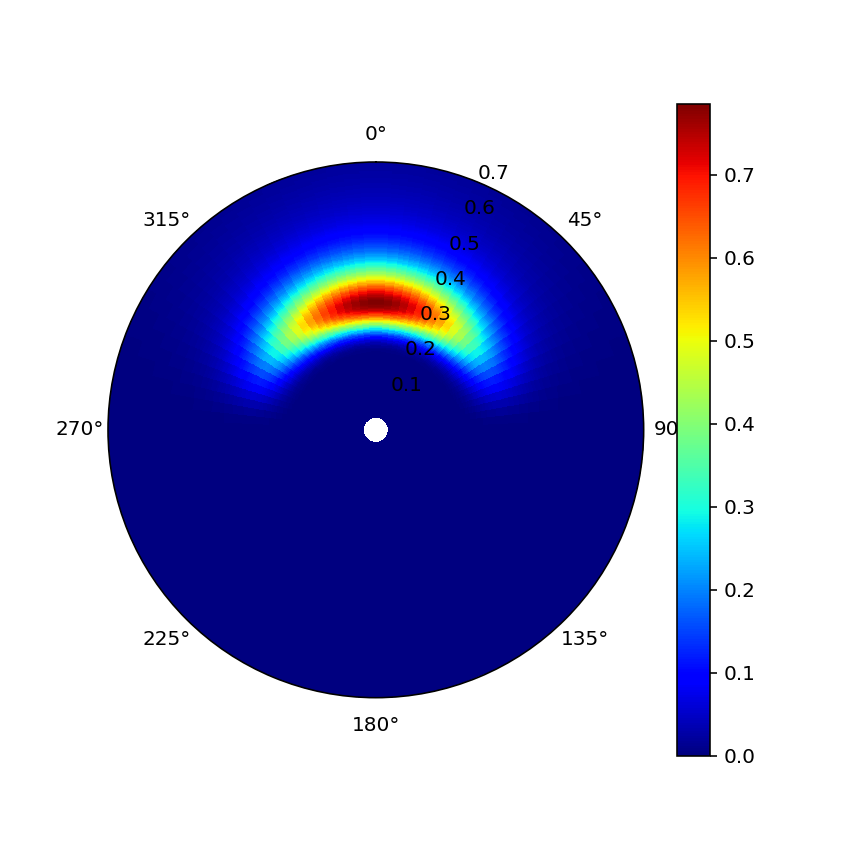

In [11]:
panel = pn.Column(
    '**POLAR REPRESENTATION - Custom Directional spectrum from Hs, Tp, and gamma parameters**',
    pn.Column(
        ii[0][0],ii[0][1],ii[0][2]
    ),
    pn.Row(ii[1]),
)
panel

$$D(\theta, s)=\frac{2^{2s-1}}{\pi}\cdot \frac{\Gamma^{2} (s+1)}{\Gamma (2s+1)}  \cdot cos^{2s} (\frac{\theta - \theta_{0}}{2})$$

$$-\pi \leq \theta \leq \pi$$

In [12]:
kw = dict(
    Hs=(0, 10, 0.5, 1.5), Tp=(0, 25, 1, 3), gamma=(1, 20, 1, 3), s=(2, 50, 1, 10)
)

In [13]:
i_LG = pn.interact(DirSpec3D_LG, **kw)
ii_LG = pn.interact(DirSpec2D_LG, **kw)

In [14]:
panel = pn.Column(
    '**3D PLOT - Custom Directional spectrum from Hs, Tp, gamma and s parameters**',
    pn.Column(
        i_LG[0][0],i_LG[0][1],i_LG[0][2], i_LG[0][3]
    ),
    pn.Row(i_LG[1]),
)
panel

Column
    [0] Markdown(str)
    [1] Column
        [0] FloatSlider(end=10, name='Hs', step=0.5, value=1.5)
        [1] IntSlider(end=25, name='Tp', value=3)
        [2] IntSlider(end=20, name='gamma', start=1, value=3)
        [3] IntSlider(end=50, name='s', start=2, value=10)
    [2] Row
        [0] Row
            [0] Plotly(Figure, name='interactive00134')

Column
    [0] Markdown(str)
    [1] Column
        [0] FloatSlider(end=10, name='Hs', step=0.5, value=1.5)
        [1] IntSlider(end=25, name='Tp', value=3)
        [2] IntSlider(end=20, name='gamma', start=1, value=3)
        [3] IntSlider(end=50, name='s', start=2, value=10)
    [2] Row
        [0] Row
            [0] Matplotlib(Figure, name='interactive00144')
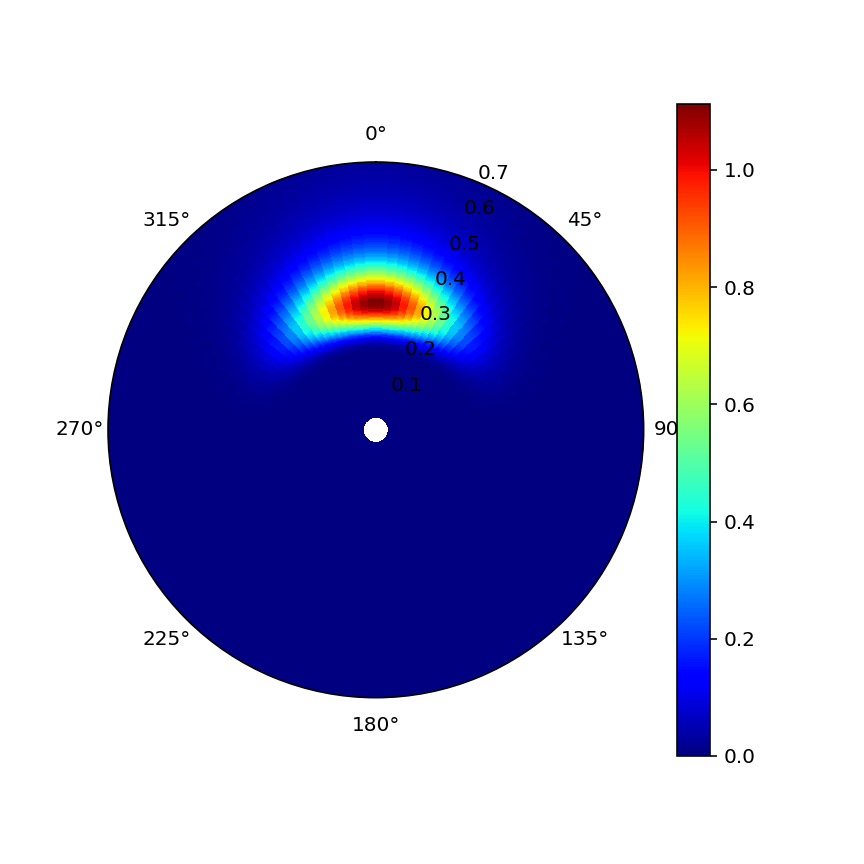

In [15]:
panel = pn.Column(
    '**POLAR REPRESENTATION - Custom Directional spectrum from Hs, Tp, gamma and s parameters**',
    pn.Column(
        ii_LG[0][0],ii_LG[0][1],ii_LG[0][2], ii_LG[0][3]
    ),
    pn.Row(ii_LG[1]),
)
panel